<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اهدای خون
</font>
</h1>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    موسسه مرکزی اهدای خون تایوان، به منظور تحلیل داده‌های خود و پیشبینی نیاز به خون در این کشور، اقدام به واگذاری داده خود به دانشگاه ملی تایوان کرده است. دانشگاه ملی تایوان پس از بررسی‌های ابتدایی و اعمال تغییرات گسترده و استفاده از تکنینک‌های تحلیل رفتاری، داده ابتدایی را به شکلی که در ادامه معرفی خواهد شد، تبدیل کرده است.
    <br>
    حال ما می‌خواهیم پیش‌بینی کنیم آیا شهروندان تایوانی در تاریخ خاصی خون اهدا می‌کنند یا خیر!
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [15]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال دو مجموعه داده در اختیار داریم. توضیحات مجموعه داده آموزش را در جدول زیر مشاهده می‌کنید: 
    <br>
    هر سطر از این مجموعه داده، اطلاعات یک شهروند را نشان می‌دهد.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|نام ویژگی|توضیحات|
|:------:|:---:|
|<code>Recency (months)</code>|تعداد ماهی که از آخرین زمان اهدای خون توسط یک شهروند می‌گذرد|
|<code>Frequency (times)</code>|تعداد دفعاتی که در کل یک شهروند خون اهدا کرده است|
|<code>Monetary (c.c. blood)</code>|مقدار سانتی‌متر مکعب خونی که یک شهروند تا به حال اهدا کرده است|
|<code>Time (months)</code>|تعداد ماهی که از اولین زمان اهدای خون توسط یک شهروند می‌گذرد|
|<code>whether he/she donated blood in March 2007</code>|آیا شهروند در مارس ۲۰۰۷ خون اهدا کرده است یا خیر (ستون هدف مسئله!)|
    
</font>
</div>
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [333]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [17]:
test

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
0                 14                  5                   1250             28
1                 13                  3                    750             14
2                  4                 11                   2750             28
3                 21                  2                    500             35
4                 16                  8                   2000             76
..               ...                ...                    ...            ...
70                11                 16                   4000             89
71                11                 17                   4250             79
72                 0                  3                    750              4
73                 4                  6                   1500             16
74                 4                  5                   1250             16

[75 rows x 4 columns]

In [316]:
train.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [18]:
train.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                16                  2                    500             70   
1                11                 10                   2500             35   
2                13                  4                   1000             21   
3                11                  4                   1000             27   
4                 4                  5                   1250             23   

   whether he/she donated blood in March 2007  
0                                           0  
1                                           0  
2                                           0  
3                                           0  
4                                           1

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [19]:
train.describe()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        673.000000         673.000000             673.000000   
mean           9.451709           5.450223            1362.555721   
std            8.185596           5.750334            1437.583540   
min            0.000000           1.000000             250.000000   
25%            3.000000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     673.000000                                  673.000000  
mean       34.228826                                    0.237741  
std        24.113656                                    0.426017  
min         2.000000                                    0.000000  
25%        16.000000                                    0.000000  
50%        28.000000                                    0.000000  
75%        50.000000                                    0.000000  
max        98.000000                                    1.000000

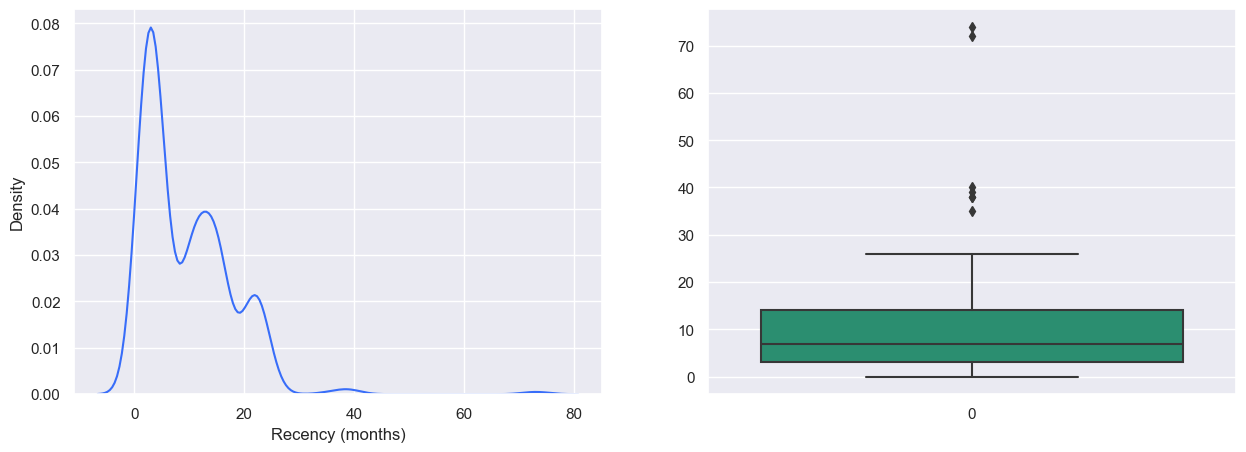

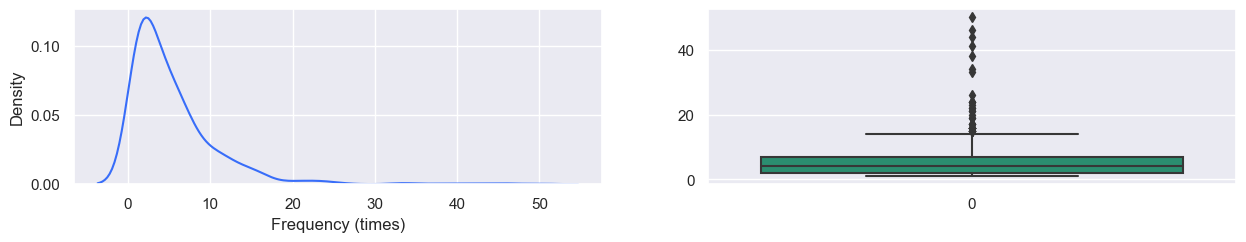

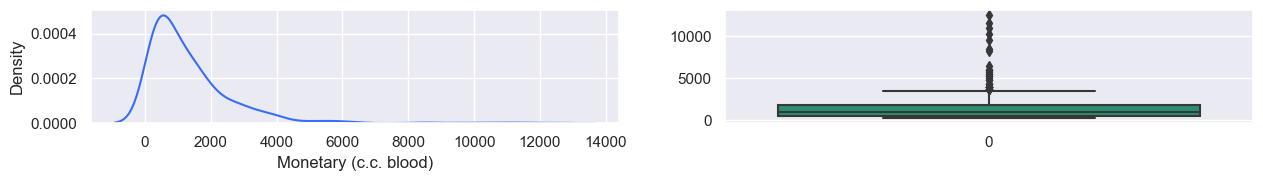

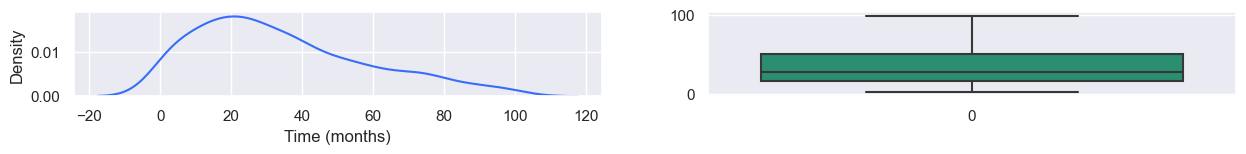

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train.iloc[:,0])
plt.subplot(1,2,2)
sns.boxplot(data=train.iloc[:,0], palette="Dark2")
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.kdeplot(data=train.iloc[:,1])
plt.subplot(2,2,2)
sns.boxplot(data=train.iloc[:,1], palette="Dark2")
plt.figure(figsize=(15,5))
plt.subplot(3,2,1)
sns.kdeplot(data=train.iloc[:,2])
plt.subplot(3,2,2)
sns.boxplot(data=train.iloc[:,2], palette="Dark2")
plt.figure(figsize=(15,5))
plt.subplot(4,2,1)
sns.kdeplot(data=train.iloc[:,3])
plt.subplot(4,2,2)
sns.boxplot(data=train.iloc[:,3], palette="Dark2")
plt.show()


In [331]:
train.isna()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0               False              False                  False   
1               False              False                  False   
2               False              False                  False   
3               False              False                  False   
4               False              False                  False   
..                ...                ...                    ...   
668             False              False                  False   
669             False              False                  False   
670             False              False                  False   
671             False              False                  False   
672             False              False                  False   

     Time (months)  whether he/she donated blood in March 2007  
0            False                                       False  
1            False                                       False  
2            False                                       False  
3            False                                       False  
4            False                                       False  
..             ...                                         ...  
668          False                                       False  
669          False                                       False  
670          False                                       False  
671          False                                       False  
672          False                                       False  

[673 rows x 5 columns]

In [334]:
for i in train.columns:
    
    q1=train[i].quantile(0.25)
    q3=train[i].quantile(0.75)
    IQR=q3-q1

    max_limit = q3 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)
    median=train[i].median()
    
    train.loc[i]=train[i].mask(train[i] > max_limit,median,inplace=True)
    train.loc[i]=train[i].mask(train[i] < min_limit,median,inplace=True)
    # train.loc[i]=train[i].fillna(median,inplace=True)

train=train.iloc[:-5,:]

C:\Users\mj749\AppData\Local\Temp\ipykernel_15476\3060757671.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train.loc[i]=train[i].mask(train[i] > max_limit,median,inplace=True)
C:\Users\mj749\AppData\Local\Temp\ipykernel_15476\3060757671.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train.loc[i]=train[i].mask(train[i] > max_limit,median,inplace=True)
C:\Users\mj749\AppData\Local\Temp\ipykernel_15476\3060757671.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train.loc[i]=train[i].mask(train[i] > max_limit,median,inplace=True)
C:\Users\mj749\AppData\Local\Temp\ipykernel_15476\3060757671.py:11: FutureWarning: The default dtype

In [335]:
train.dtypes

Recency (months)                              float64
Frequency (times)                             float64
Monetary (c.c. blood)                         float64
Time (months)                                 float64
whether he/she donated blood in March 2007    float64
dtype: object

In [290]:
train.iloc[:,0].median()

7.0

In [278]:
q1=train.iloc[:,2].quantile(0.25)
q3=train.iloc[:,2].quantile(0.75)
IQR=q3-q1

max_limit = q3 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

In [341]:
x0 = train.iloc[:,:-1].values # >
x1 = train.iloc[:,[0,1,3]].values ## >
x2 = train.iloc[:,[0,1,2]].values
x3= train.iloc[:,[0,1]].values  ## > 
y = train.iloc[:,[-1]].values


In [218]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np




In [347]:
# solver : {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'
# def score_model(X, y, kf):

from sklearn.metrics import f1_score

kf = KFold(n_splits=5, shuffle=True)
def score_model(X, y):
    
    
    f1_scores2 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index] , y[test_index]
        model = LogisticRegression(solver='newton-cg')
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        
        f1_scores2.append(f1_score(y_test, y_pred, average='macro'))
        
    
    
    print("f1 score2:", np.mean(f1_scores2))



In [349]:
x0

array([[1.6e+01, 2.0e+00, 5.0e+02, 7.0e+01],
       [1.1e+01, 1.0e+01, 2.5e+03, 3.5e+01],
       [1.3e+01, 4.0e+00, 1.0e+03, 2.1e+01],
       ...,
       [4.0e+00, 2.0e+00, 5.0e+02, 1.3e+01],
       [4.0e+00, 1.0e+00, 2.5e+02, 4.0e+00],
       [4.0e+00, 2.0e+00, 5.0e+02, 4.0e+00]])

In [348]:

score1=score_model(x0, y)
score2=score_model(x1, y)
score3=score_model(x2, y)
score4=score_model(x3, y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [350]:

from sklearn.preprocessing import PolynomialFeatures,StandardScaler 
from sklearn.linear_model import LogisticRegression 
def Test(X,y):
    i=0
    pred0 =[]
    pred1 =[]
    pred2 =[]
    pred3 =[]
    xs1=[]
    
    kf = KFold(n_splits=5, shuffle=True)
    for x in X:  ##                                                              4
        j=0
        xs2=[]
        for train_index, test_index in kf.split(x): ##                           5
          
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index] , y[test_index]
            std_scaler = StandardScaler().fit(x_train)
            x_train = std_scaler.transform(x_train)
            poly_transformer = PolynomialFeatures(degree=2)
            poly_transformer.fit(x_train)
            poly_features = poly_transformer.transform(x_train)
            model0 = LogisticRegression()
            model1 = LogisticRegression(C=0.1)
            model2 = LogisticRegression(C=0.1)
            model4 = LogisticRegression()
    
            model0.fit(x_train, y_train)
            model1.fit(x_train, y_train)
            model2.fit(poly_features, y_train)
            model4.fit(poly_features, y_train)
            y_pred0 = model0.predict(std_scaler.transform(x_test))
            y_pred1 = model1.predict(std_scaler.transform(x_test))
            y_pred2 = model2.predict(poly_transformer.transform(std_scaler.transform(x_test)))
            y_pred3 = model4.predict_proba(poly_transformer.transform(std_scaler.transform(x_test)))[:, 1] > 0.35
            
            pred0.append(f1_score(y_test, y_pred0, average='macro'))
            pred1.append(f1_score(y_test, y_pred1, average='macro'))
            pred2.append(f1_score(y_test, y_pred2, average='macro'))
            pred3.append(f1_score(y_test, y_pred3, average='macro'))
            
            xs2.append((pred0[-1]+pred1[-1]+pred2[-1]+pred3[-1])/4)
            
            j+=1
            
        xs1.append(sum(xs2)/5)
        
        
            
        i+=1
        
        
        
        
        
    print("avg for model:\n")
    print("model0",sum(pred0)/len(pred0))
    print("model1",sum(pred1)/len(pred1))
    print("model2",sum(pred2)/len(pred2))
    print("model3",sum(pred3)/len(pred3))
    
    
    
    
    
    print("\navg for features\n")
    for i in range(4):
        
         print(f"x{i}:{xs1[i]}")
    
    

In [351]:
train.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [352]:

Test((x0,x1,x2,x3),y)


c:\Users\mj749\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    برای ارزیابی عملکرد مدل خود می‌توانید از معیار <code>f1_score</code> که در حالت <i>macro</i> میانگیری می‌کند، استفاده کنید. برای استفاده در کد می‌توانید به قطعه کد زیر توجه کنید.
    <br>
</font>
</p>

```
    from sklearn.metrics import f1_score
    print(f1_score(y_true, y_pred, average='macro'))
```


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    برای کسب اطلاعات بیشتر در مورد <code>macro f1_score</code> می توانید <a href="https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f#:~:text=The%20macro%2Daveraged%20F1%20score,regardless%20of%20their%20support%20values.&text=The%20value%20of%200.58%20we,score%20in%20our%20classification%20report.">این لینک</a> را مطالعه کنید.
</font>
</p>



In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


x=train.iloc[:,:-1]

# x=train.iloc[:,[0,1,3]]
# test=test.iloc[:,[0,1,3]]

y = train.iloc[:,[-1]]

std_scaler = StandardScaler().fit(x)
x_train = std_scaler.transform(x)
poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(x_train)
poly_features = poly_transformer.transform(x_train)
model = LogisticRegression()
model.fit(poly_features, y.values.ravel())
# model.fit(x_train, y)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای وابسته به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|prediction|آیا شهروند در مارس ۲۰۰۷ خون اهدا کرده است یا خیر|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>prediction</i> است و ۷۵ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، اعداد ستون <i>prediction</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||prediction|
|----|-----|
|0|0|
|1|0|
|2|0|
|3|1|
|4|0|

</font>
</div>



LogisticRegression()

In [123]:
x

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
0                  16                  2                    500             70
1                  11                 10                   2500             35
2                  13                  4                   1000             21
3                  11                  4                   1000             27
4                   4                  5                   1250             23
..                ...                ...                    ...            ...
668                 4                  1                    250              4
669                12                 12                   3000             58
670                 4                  2                    500             13
671                 4                  1                    250              4
672                 4                  2                    500              4

[673 rows x 4 columns]

In [124]:
test


Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
0                 14                  5                   1250             28
1                 13                  3                    750             14
2                  4                 11                   2750             28
3                 21                  2                    500             35
4                 16                  8                   2000             76
..               ...                ...                    ...            ...
70                11                 16                   4000             89
71                11                 17                   4250             79
72                 0                  3                    750              4
73                 4                  6                   1500             16
74                 4                  5                   1250             16

[75 rows x 4 columns]

In [228]:
# Predict for test data :)

submission = pd.DataFrame(model.predict_proba(poly_transformer.transform(std_scaler.transform(test)))[:, 1] > 0.35,columns=["prediction"]).astype(int)
submission

prediction
0            0
1            0
2            1
3            0
4            0
..         ...
70           0
71           0
72           1
73           1
74           1

[75 rows x 1 columns]

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید.
    <br>
    فایل <code>result.zip</code> را در کوئرا می‌بایست آپلود کنید و منتظر نتیجه داوری بمانید!
    <br>
    این فایل شامل <code>submission.csv</code> ، همین نوت‌بوک که در حال کد زدن داخل آن هستید و ذخیره شده مدل شماست.
</font>
</p>

In [229]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)

file_names = ['model', 'submission.csv', 'blood_donation.ipynb']
compress(file_names)

File Paths:
['model', 'submission.csv', 'blood_donation.ipynb']
